In [1]:
import pandas as pd

In [38]:
df = pd.read_csv(r"data.csv")

In [5]:
df.head()

,testcasename,expected,results
0,test1,10.0,20.0
1,test2,20.0,20.0
2,test3,50.0,50.0
3,test4,15.0,15.0
4,test5,25.0,20.0


In [39]:
df['expected'].fillna(df['expected'].mean(), inplace = True)
df

,testcasename,expected,results
0,test1,10.000000,20.0
1,test2,20.000000,20.0
2,test3,50.000000,50.0
3,test4,15.000000,15.0
4,test5,25.000000,20.0
5,test6,20.833333,30.0
6,test7,20.833333,NaN
7,test8,5.000000,NaN


In [40]:
df['results'].fillna(df['results'].mean(), inplace = True)
df

,testcasename,expected,results
0,test1,10.000000,20.000000
1,test2,20.000000,20.000000
2,test3,50.000000,50.000000
3,test4,15.000000,15.000000
4,test5,25.000000,20.000000
5,test6,20.833333,30.000000
6,test7,20.833333,25.833333
7,test8,5.000000,25.833333


In [43]:
df['status'] = None

In [44]:
for ind in df.index:
    if df['expected'][ind] == df['results'][ind]:
        df['status'][ind] = 'pass'
    elif df['expected'][ind] != df['results'][ind]:
        df['status'][ind] = 'Fail'

<ipython-input-44-9ab5c9559fa0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['status'][ind] = 'Fail'
<ipython-input-44-9ab5c9559fa0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['status'][ind] = 'pass'


In [45]:
df

,testcasename,expected,results,status
0,test1,10.000000,20.000000,Fail
1,test2,20.000000,20.000000,pass
2,test3,50.000000,50.000000,pass
3,test4,15.000000,15.000000,pass
4,test5,25.000000,20.000000,Fail
5,test6,20.833333,30.000000,Fail
6,test7,20.833333,25.833333,Fail
7,test8,5.000000,25.833333,Fail


<AxesSubplot:>

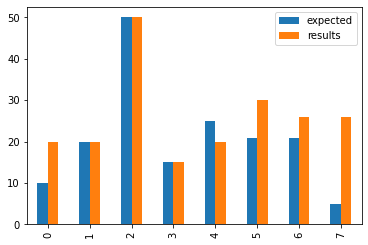

In [33]:
df.plot.bar()

In [34]:
help(pd.factorize)

Help on function factorize in module pandas.core.algorithms:

factorize(values, sort: 'bool' = False, na_sentinel: 'Optional[int]' = -1, size_hint: 'Optional[int]' = None) -> "Tuple[np.ndarray, Union[np.ndarray, 'Index']]"
    Encode the object as an enumerated type or categorical variable.
    
    This method is useful for obtaining a numeric representation of an
    array when all that matters is identifying distinct values. `factorize`
    is available as both a top-level function :func:`pandas.factorize`,
    and as a method :meth:`Series.factorize` and :meth:`Index.factorize`.
    
    Parameters
    ----------
    values : sequence
        A 1-D sequence. Sequences that aren't pandas objects are
        coerced to ndarrays before factorization.
    sort : bool, default False
        Sort `uniques` and shuffle `codes` to maintain the
        relationship.
    
    na_sentinel : int or None, default -1
        Value to mark "not found". If None, will not drop the NaN
        from 

In [47]:
df['status'] = pd.get_dummies(df['status'])

In [56]:
df[df['status'] == 1]['testcasename'].count()

5

In [51]:
df['status'].value_counts()

1    5
0    3
Name: status, dtype: int64

In [48]:
df

,testcasename,expected,results,status
0,test1,10.000000,20.000000,1
1,test2,20.000000,20.000000,0
2,test3,50.000000,50.000000,0
3,test4,15.000000,15.000000,0
4,test5,25.000000,20.000000,1
5,test6,20.833333,30.000000,1
6,test7,20.833333,25.833333,1
7,test8,5.000000,25.833333,1


<AxesSubplot:xlabel='testcasename'>

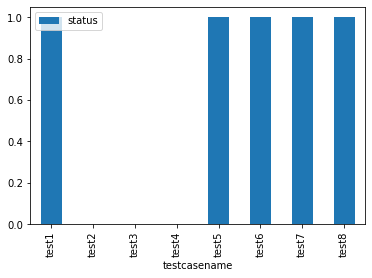

In [50]:
df.plot.bar(0,-1)